In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
#This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#It's a great dataset for evaluating simple regression models. The dataset is from kaggle. https://www.kaggle.com/harlfoxem/housesalesprediction

In [16]:
house_data = pd.read_csv("kc_house_data.csv")

In [17]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
>>> X = house_data[['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = house_data['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
bedrooms,-37136.235722
bathrooms,45625.584196
sqft_living,111.990095
sqft_lot,0.023123
floors,26794.863372
waterfront,604156.775900
view,43533.415507
grade,118053.616899
sqft_above,51.836530
sqft_basement,60.153565


In [31]:
y_pred = regressor.predict(X_test)

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
17384,297000.0,2.897388e+05
722,1580000.0,1.481052e+06
2680,562100.0,5.227507e+05
18754,631500.0,5.575611e+05
14554,780000.0,8.510376e+05
16227,485000.0,2.980716e+05
6631,340000.0,4.486513e+05
19813,335606.0,5.462897e+05
3367,425000.0,6.489426e+05
21372,490000.0,1.182986e+06


In [45]:
df1['diff'] = df1['Actual'] - df1['Predicted']
df1 = df1.sort_values(by='Actual')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df1.Predicted[17384]

289738.84680587705

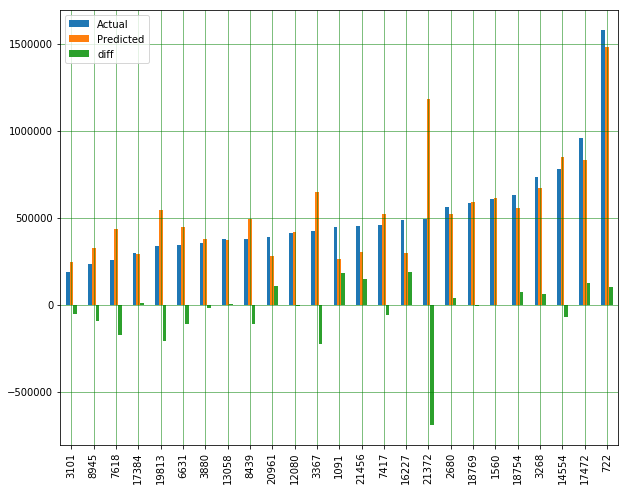

In [47]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136243.38814812695
Mean Squared Error: 42340574552.13962
Root Mean Squared Error: 205768.25448095636


In [18]:
>>> reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6528261129996262

In [19]:
reg.coef_

array([-3.87793537e+04,  4.75432095e+04,  1.09886918e+02, -9.04347806e-03,
        2.52098458e+04,  5.80634688e+05,  4.37197618e+04,  1.20173845e+05,
        5.04099487e+01,  5.94769692e+01, -3.76612034e+03,  4.95470184e+00,
       -4.06763957e+01,  2.35290653e+01, -5.39707130e-01])

In [20]:
reg.intercept_

10634232.014568053

In [23]:
len(list(reg.predict(X)))

21613

In [9]:
import statsmodels.api as sm
from scipy import stats

In [10]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2901.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:48:41   Log-Likelihood:            -2.9619e+05
No. Observations:               21613   AIC:                         5.924e+05
Df Residuals:                   21598   BIC:                         5.925e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.063e+07    3.1e+06      3.434

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
#We dropped columns that had a p value of more than 0.05 which were zip code, sqft_lot and yr_renovated
>>> X_1 = house_data[['bedrooms', 'bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']]
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = house_data['price']
>>> reg = LinearRegression().fit(X_1, y)


In [23]:
X2 = sm.add_constant(X_1)
est1 = sm.OLS(y, X2)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3692.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:21:11   Log-Likelihood:            -2.9619e+05
No. Observations:               21613   AIC:                         5.924e+05
Df Residuals:                   21601   BIC:                         5.925e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.643e+06   1.24e+05     53.710

C:\Users\Aaron\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
